In [1]:
#Step 1: Standardization

import pandas as pd
from sklearn.preprocessing import StandardScaler

#Download the Training Data
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('y_train.txt', delim_whitespace=True, header=None)

#Standarize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(X_train_scaled.describe())

<ipython-input-1-5654a359d8d9>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None)
<ipython-input-1-5654a359d8d9>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv('y_train.txt', delim_whitespace=True, header=None)


                0             1             2             3            4    \
count  7.352000e+03  7.352000e+03  7.352000e+03  7.352000e+03  7352.000000   
mean  -3.131336e-16  4.783986e-17  8.698156e-17 -1.507680e-16     0.000000   
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00     1.000068   
min   -1.814049e+01 -2.407152e+01 -1.573085e+01 -8.793362e-01    -0.972792   
25%   -1.638693e-01 -1.756427e-01 -2.092798e-01 -8.631868e-01    -0.929530   
50%    3.850502e-02  1.167141e-02  8.206943e-03 -7.594273e-01    -0.678376   
75%    1.988854e-01  1.693906e-01  2.003738e-01  8.081625e-01     0.948462   
max    1.032661e+01  2.493878e+01  1.958529e+01  3.577947e+00     2.839526   

                5             6             7             8             9    \
count  7.352000e+03  7.352000e+03  7.352000e+03  7.352000e+03  7.352000e+03   
mean   2.938044e-16  3.865847e-17 -9.278034e-17  5.412186e-17  1.932924e-17   
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+0

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


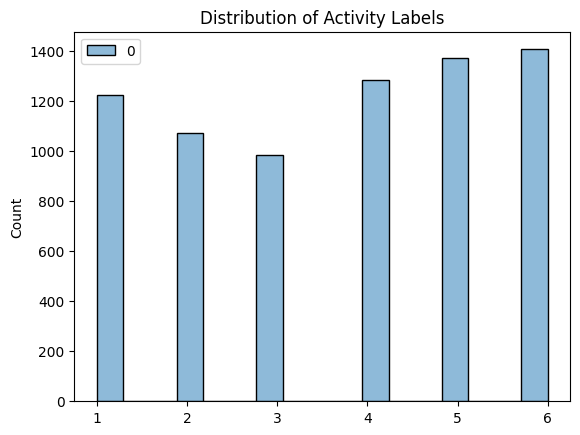

In [2]:
#Step 2: Exploratory Data Analysis

import seaborn as sns
import matplotlib.pyplot as plt

#Histogram of the Activity Labels
sns.histplot(y_train, kde=False)
plt.title('Distribution of Activity Labels')
plt.show()

Explained variance ratio: [0.50781172 0.0658068  0.02806437 0.02503953 0.01888285 0.01724006
 0.01371011 0.01199078 0.0099586  0.00965087]


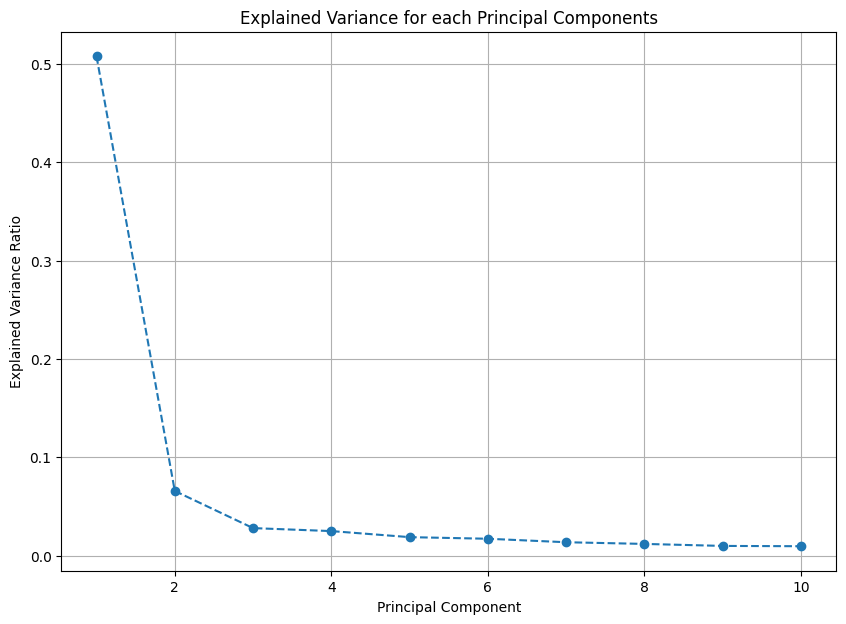

In [3]:
from sklearn.decomposition import PCA

#Apply PCA on Features to Reduce Dimensionality
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)

#Plot the Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

plt.figure(figsize=(10, 7))

plt.plot(range(1, 11), explained_variance_ratio, marker='o', linestyle='--')

plt.title('Explained Variance for each Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

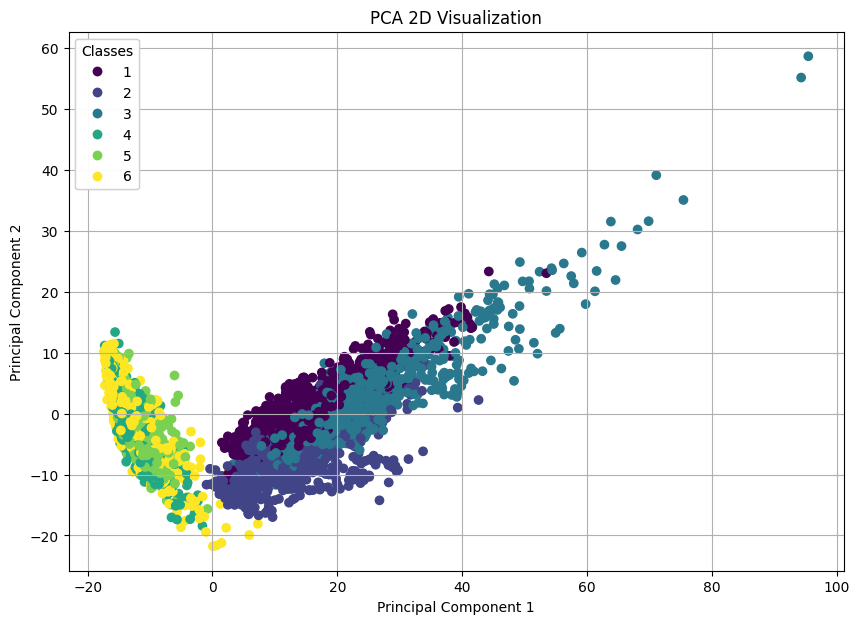

In [4]:
#Use the First 2 Components to Visualize Dataset in 2D Based on Activity Labels
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 7))

#Using Scatter Plot
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train)

#Create a Legend
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.title('PCA 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

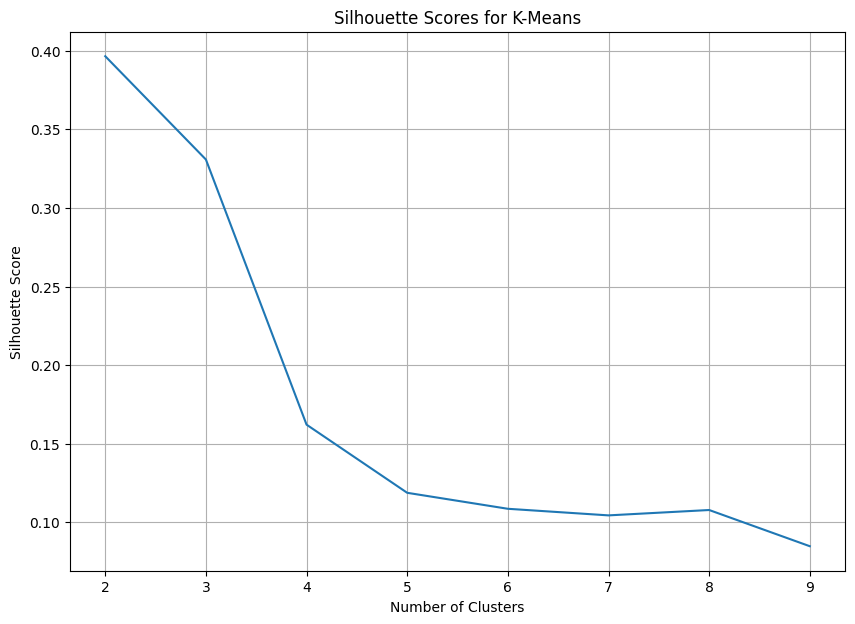

0.08477438714355022

In [5]:
#Step 3: Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Applying K-Means and Silhouette Score to Determine Optimal Number of Clusters
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X_train_scaled)
    silhouette_scores.append(silhouette_score(X_train_scaled, labels))

plt.figure(figsize=(10, 7))

plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
silhouette_score(X_train_scaled, labels)

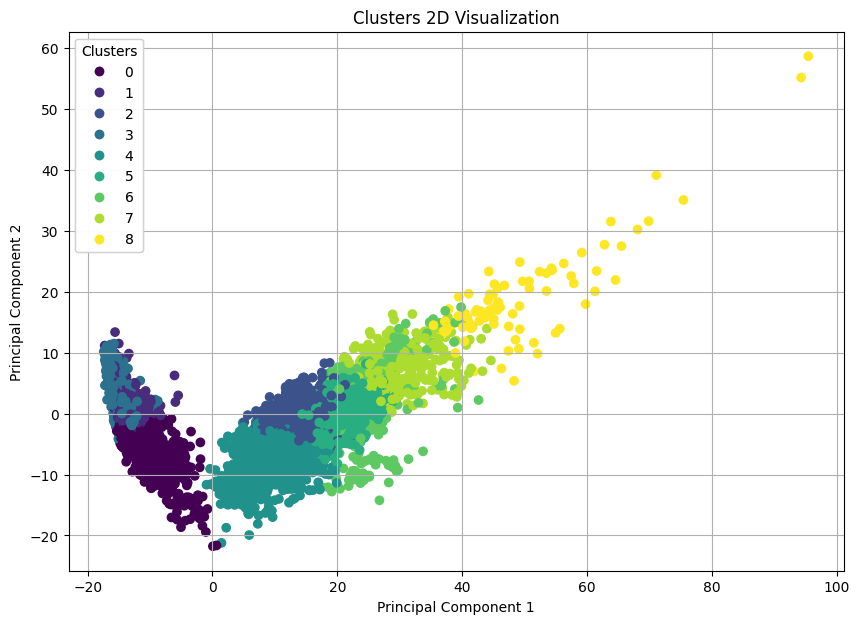

In [7]:
#Visualize Clusters in 2D Using the First 2 Principle Components Using Cluster Labels
pca_2d = PCA(n_components=2)
labels_pca_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 7))

#Scatter Plot
scatter = plt.scatter(labels_pca_2d[:, 0], labels_pca_2d[:, 1], c=labels)

#Create Legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.title('Clusters 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

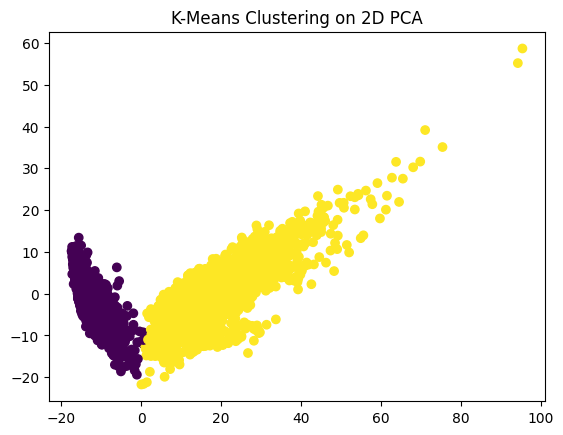

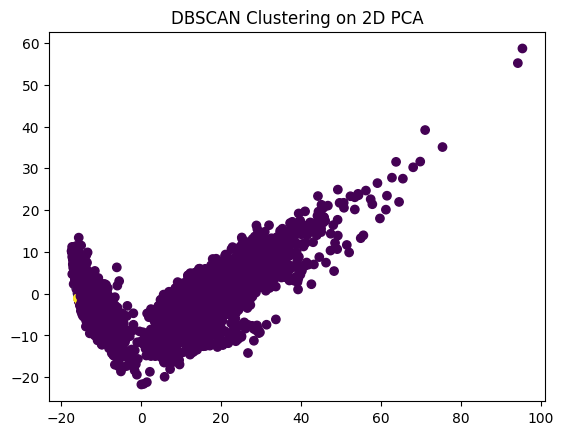

In [8]:
#K-Means and DBSCAN Clustering on 2D PCA

from sklearn.cluster import DBSCAN

#For K-Means
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X_train_pca_2d)
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering on 2D PCA')
plt.show()

#For DBSCAN
dbscan = DBSCAN(eps=8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_scaled)
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering on 2D PCA')
plt.show()

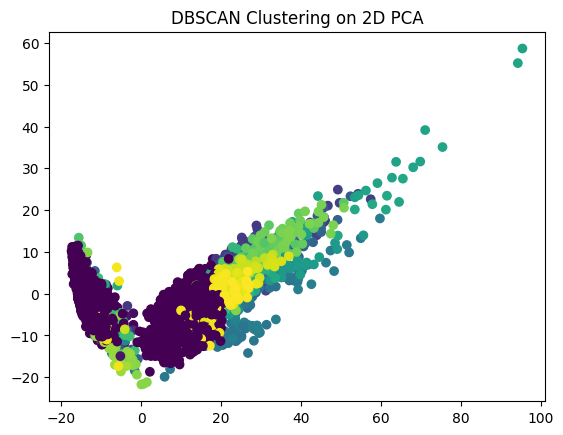

In [14]:
#DBSCAN Clustering Modified Parameters

dbscan = DBSCAN(eps=15, min_samples=1)
dbscan_labels = dbscan.fit_predict(X_train_scaled)
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering on 2D PCA')
plt.show()

In [17]:
#Step 4: Feature Selection

from sklearn.ensemble import RandomForestClassifier
import numpy as np

#Top k Principal Components (Change to k=2 to get lower scores in step 5 as seen in the report)
k = 50
pca = PCA(n_components=k)
X_train_pca_k = pca.fit_transform(X_train_scaled)

#Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel())

#Feature Importance Scores
importances = rf.feature_importances_

#Indices of the Top k Important Features (Change to k=2 to get lower scores in step 5 as seen in the report)
k = 50
indices = np.argsort(importances)[-k:]

#Select Only the Top k Features from the Original Dataset
X_train_rf_k = X_train.iloc[:, indices]

print(f"Shape of X after PCA: {X_train_pca_k.shape}")
print(f"Shape of X with top {k} important features: {X_train_rf_k.shape}")

Shape of X after PCA: (7352, 50)
Shape of X with top 50 important features: (7352, 50)


In [18]:
#Step 5: Supervised Learning With Selected Features

from sklearn.preprocessing import StandardScaler
import pandas as pd

X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('y_test.txt', delim_whitespace=True, header=None)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Train on the Full Feature Set Using Logistic Regression
model_full = LogisticRegression()
model_full.fit(X_train_scaled, y_train)
y_pred_full = model_full.predict(X_test_scaled)
print("Full Feature Set Performance:")
print(accuracy_score(y_test, y_pred_full))
print(classification_report(y_test, y_pred_full))

#Train on the PCA-Reduced Feature Set Using Logistic Regression
model_pca = LogisticRegression()
model_pca.fit(X_train_pca_k, y_train)
y_pred_pca = model_pca.predict(pca.transform(X_test_scaled))
print("PCA-Reduced Feature Set Performance:")
print(accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

#Train on the Random Forest-Reduced Feature Set
model_rf = LogisticRegression()
model_rf.fit(X_train_rf_k, y_train)
y_pred_rf = model_rf.predict(X_test.iloc[:, indices])  # Select same features in the test set
print("Random Forest-Reduced Feature Set Performance:")
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


<ipython-input-18-a144ae30dd63>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None)
<ipython-input-18-a144ae30dd63>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv('y_test.txt', delim_whitespace=True, header=None)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale t

Full Feature Set Performance:
0.9623345775364778
              precision    recall  f1-score   support

           1       0.98      0.97      0.97       496
           2       0.96      0.97      0.97       471
           3       0.97      0.97      0.97       420
           4       0.95      0.91      0.93       491
           5       0.92      0.95      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PCA-Reduced Feature Set Performance:
0.9134713267729895
              precision    recall  f1-score   support

           1       0.94      0.93      0.93       496
           2       0.90      0.91      0.90       471
           3       0.92      0.93      0.92       420
           4       0.86      0.84      0.85       491
           5       0.86      0.90      0.88       532
           6       1.00      0.98      0.99       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947

Random Forest-Reduced Feature Set Performance:
0.8890397013912453
              precision    recall  f1-score   support

           1       0.91      0.98      0.94       496
           2       0.90      0.91      0.90       471
           3       0.96      0.88      0.92       420
           4       0.84      0.73      0.78       491
           5       0.76      0.87      0.81       532
          

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
